<a href="https://colab.research.google.com/github/dasdasqs2/Machine-learning/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1
- Predicting Boston housing Prices using Neural Network

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


## Data Preprocessing(regularization)

In [3]:
x_mean = train_X.mean() # 먼저 평균값을 구함(x1~x13)
x_std = train_X.std() # 표준편차 구함(x1~x13)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


## Traditional Neural Network Model

In [4]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),#input layer에 있는 특징이 13개(x1~x13) 노드는 52개
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse') #learning_rate=0.07, cost=mse
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                640       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,452
Trainable params: 3,452
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 1s 49ms/step - loss: 1.4791 - val_loss: 1.1477
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.8563 - val_loss: 1.6102
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.7966 - val_loss: 1.0303
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6894 - val_loss: 1.0476
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.8169 - val_loss: 1.0568
Epoch 6/25
10/10 [==============================] - 0s 6ms/step - loss: 0.7009 - val_loss: 1.0928


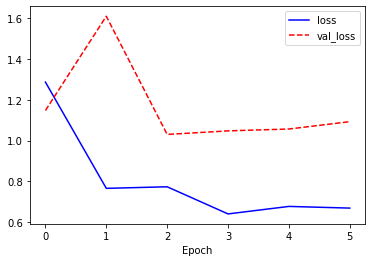

In [6]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.6887


0.6886761784553528

## Designed Neural Network Model
- Dropout : 전체 노드를 weight 계산에 참여시키지 않고, 일부를 생략하는 아이디어 => weight의 동조화 현상(co-adptation)을 피할 수 있다.
- relu 함수 호출 후 다음 layer에 전달하기 전 dropout 함수를 호출

In [8]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=64, activation='relu', input_shape=(13,)),#input layer에 있는 노드가 13개(x1~x13)
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(units=64, activation='relu'),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(units=64, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(lr = 0.001), loss='mse') #learning_rate=0.07, cost=mse
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
____________________________________________________

In [9]:
history = model2.fit(train_X, train_Y, epochs=100, batch_size=16, validation_split=0.2,
callbacks=[tf.keras.callbacks.EarlyStopping(patience=30, monitor='val_loss')])

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 0.9167 - val_loss: 0.8531
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7281 - val_loss: 0.8171
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.8394 - val_loss: 0.9331
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.8326 - val_loss: 0.8942
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8196 - val_loss: 1.0232
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8616 - val_loss: 0.8224
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.8593 - val_loss: 0.8100
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6673 - val_loss: 0.8280
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8032 - val_loss: 0.8039
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6474 - val_loss: 0.8364
Epoch 11

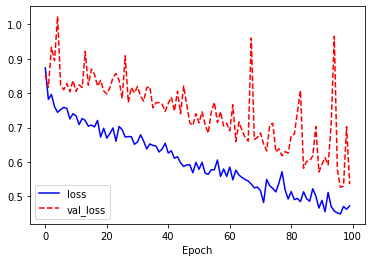

In [10]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [11]:
model2.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.4790


0.47903791069984436